# Boston house price prediction

Columns:
- **CRIM: ** Per capita crime rate by town
- **ZN: ** Proportion of residential land zoned for lots over 25,000 sq. ft
- **INDUS: ** Proportion of non-retail business acres per town
- **CHAS : ** Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- **NOX: ** Nitric oxide concentration (parts per 10 million)
- **RM: ** Average number of rooms per dwelling
- **AGE: ** Proportion of owner-occupied units built prior to 1940
- **DIS: ** Weighted distances to five Boston employment centers
- **RAD: ** Index of accessibility to radial highways
- **PTRATIO: ** Pupil-teacher ratio by town
- **B: ** 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
- **LSTAT: ** Percentage of lower status of the population
- **MEDV: ** Median value of owner-occupied homes in $1000s
The target of this Assignment is to be able to predict the target variable (Median house value), given the other input variables

In [2]:
# Importing the libraries 
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Importing the Boston Housing dataset
from sklearn.datasets import load_boston
boston = load_boston()

c:\Users\cflun\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [4]:
# Initializing the dataframe
data = pd.DataFrame(boston.data)

In [5]:
# See head of the dataset
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
#Adding the feature names to the dataframe
data.columns = boston.feature_names
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Each record in the database describes a Boston suburb or town.

In [7]:
#Adding target variable to dataframe
data['MEDV'] = boston.target 
# Median value of owner-occupied homes in $1000s

In [8]:
#Check the shape of dataframe
data.shape

(506, 14)

In [9]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [10]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [11]:
# Identifying the unique number of values in the dataset
data.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [12]:
# Check for missing values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [13]:
# See rows with missing values
data[data.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


In [14]:
# Viewing the data statistics
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [15]:
# Finding out the correlation between the features
corr = data.corr()
corr.shape

(14, 14)

<AxesSubplot:>

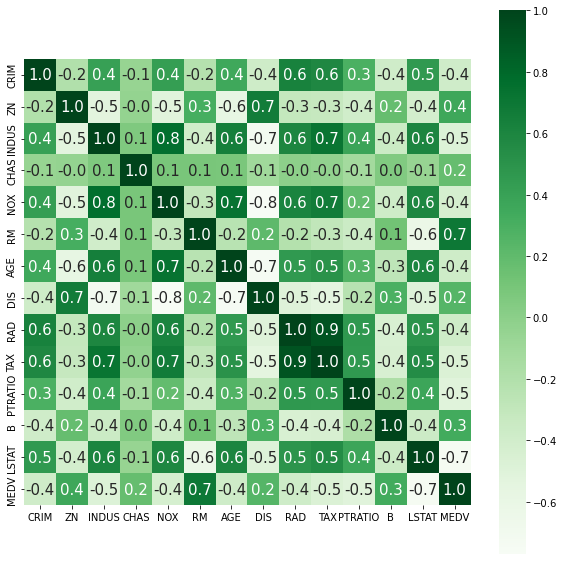

In [17]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [18]:
# Spliting target variable and independent variables
X = data.drop(['MEDV'], axis = 1)
y = data['MEDV']

**What ML task is this? Classification? Regression? Clustering?**

*This is a regression task. The goal is to predict a continuous numerical value (median house value) based on the input variables(CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT	). The target variable (median house value) is a continuous value, which makes this a regression problem rather than a classification or clustering problem *

**What kind of models would be best to accomplish this?**


Given the nature of the problem, several regression models can be considered to accomplish this task, including:

Linear Regression: A simple and interpretable model that assumes a linear relationship between the input features and the target variable. 

Decision Trees: These can capture nonlinear relationships in the data and are capable of handling a mix of categorical and numerical features. 

Random Forest: An ensemble of decision trees that can handle complex relationships and reduce overfitting. 

Gradient Boosting: Algorithms like XGBoost, LightGBM, and CatBoost are powerful ensemble techniques that can often provide excellent predictive performance. 

Neural Networks: Deep learning models can be used for regression tasks, especially when dealing with large amounts of data.

**How would you maximize performance of the models that you evaluate for this task?**


To maximize the performance of the models, you should consider the following steps:

Data Preprocessing: Handle missing values, scale/normalize features, and encode categorical variables if necessary.

Feature Selection/Engineering: Select relevant features and possibly create new features that could enhance the predictive power of the models.

Model Selection: Try a variety of regression algorithms and evaluate their performance using appropriate metrics such as mean squared error (MSE) or R-squared (coefficient of determination).

Hyperparameter Tuning: Tune the hyperparameters of the selected models to find the best configuration.

Cross-Validation: Use techniques like k-fold cross-validation to ensure the model's generalization performance.

Regularization: Apply regularization techniques like L1 or L2 regularization to prevent overfitting, especially in linear models.

Ensembling: Combine predictions from multiple models to potentially improve overall performance."

**How much is the cost of this model? (Time and compute cost)**


The cost of the model will depend on factors like the size of the dataset, complexity of the chosen model, and the available computational resources. Some models may require more computational power and time for training and tuning, such as deep neural networks.

**Which model gives the best RoI (Return on Investment)?**


To determine the best Return on Investment (RoI), you should consider both the predictive performance and the computational resources required for training and inference. Some models might provide slightly better performance but at a significantly higher computational cost, making them less practical in certain situations.

**Can you discover a model that performs this prediction task with a score of over 0.9?**


In [19]:
# Splitting to training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

# Linear regression

#### Training the model

In [20]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)

LinearRegression()

In [21]:
# Value of y intercept
lm.intercept_

36.35704137659519

In [22]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,CRIM,-0.12257
1,ZN,0.055678
2,INDUS,-0.008834
3,CHAS,4.693448
4,NOX,-14.435783
5,RM,3.28008
6,AGE,-0.003448
7,DIS,-1.552144
8,RAD,0.32625
9,TAX,-0.014067


#### Model Evaluation

In [23]:
# Model prediction on train data
y_pred = lm.predict(X_train)

In [24]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7465991966746854
Adjusted R^2: 0.736910342429894
MAE: 3.089861094971122
MSE: 19.073688703469035
RMSE: 4.367343437774162


𝑅^2 : It is a measure of the linear relationship between X and Y. It is interpreted as the proportion of the variance in the dependent variable that is predictable from the independent variable.

Adjusted 𝑅^2 :The adjusted R-squared compares the explanatory power of regression models that contain different numbers of predictors.

MAE : It is the mean of the absolute value of the errors. It measures the difference between two continuous variables, here actual and predicted values of y. 

MSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. 

RMSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. 






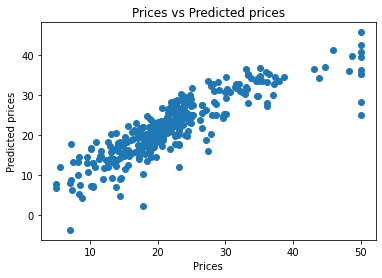

In [25]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

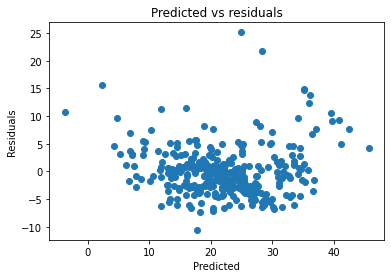

In [26]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

There is no pattern visible in this plot and values are distributed equally around zero. So Linearity assumption is satisfied

c:\Users\cflun\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


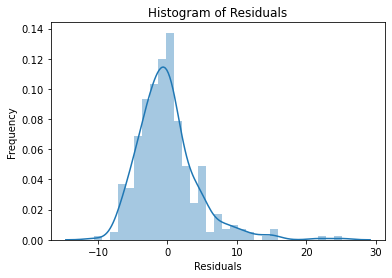

In [27]:
# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

    Here the residuals are normally distributed. So normality assumption is satisfied

#### For test data

In [28]:
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)

In [29]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.7121818377409206
Adjusted R^2: 0.6850685326005725
MAE: 3.8590055923707407
MSE: 30.05399330712402
RMSE: 5.482152251362964


Here the model evaluations scores are almost matching with that of train data. So the model is not overfitting.

# Random Forest Regressor 

#### Train the model

In [30]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

RandomForestRegressor()

### Model Evaluation

In [31]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [32]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9777343393327192
Adjusted R^2: 0.976883005248382
MAE: 0.8595141242937856
MSE: 1.6759547514124316
RMSE: 1.2945867106580506


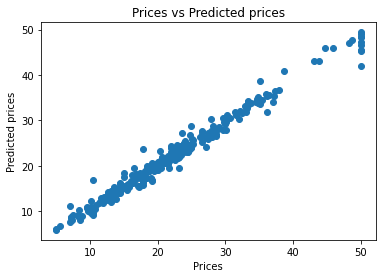

In [33]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

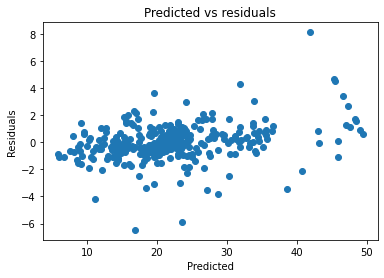

In [34]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

#### For test data

In [35]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [36]:
# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8350983513410151
Adjusted R^2: 0.8195641380615455
MAE: 2.4730065789473676
MSE: 17.219042072368417
RMSE: 4.149583361298869


# XGBoost Regressor

#### Training the model

In [37]:
# Import XGBoost Regressor
from xgboost import XGBRegressor

#Create a XGBoost Regressor
reg = XGBRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

max_depth (int) – Maximum tree depth for base learners.

learning_rate (float) – Boosting learning rate (xgb’s “eta”)

n_estimators (int) – Number of boosted trees to fit.

gamma (float) – Minimum loss reduction required to make a further partition on a leaf node of the tree.

min_child_weight (int) – Minimum sum of instance weight(hessian) needed in a child.

subsample (float) – Subsample ratio of the training instance.

colsample_bytree (float) – Subsample ratio of columns when constructing each tree.

objective (string or callable) – Specify the learning task and the corresponding learning objective or a custom objective function to be used (see note below).

nthread (int) – Number of parallel threads used to run xgboost. (Deprecated, please use n_jobs)

scale_pos_weight (float) – Balancing of positive and negative weights.


### Model Evaluation

In [38]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [39]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9999980912185324
Adjusted R^2: 0.9999980182357117
MAE: 0.008653184923075066
MSE: 0.00014367556470779537
RMSE: 0.011986474240067234


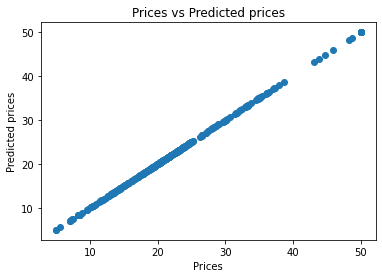

In [40]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

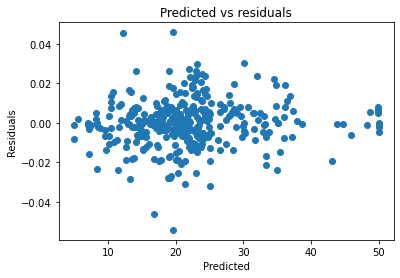

In [41]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

#### For test data

In [42]:
#Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [43]:
# Model Evaluation
acc_xgb = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8579951986672496
Adjusted R^2: 0.8446179347735847
MAE: 2.5309582503218397
MSE: 14.828151619536392
RMSE: 3.850733906612659


# SVM Regressor

In [44]:
# Creating scaled set to be used in model to improve our results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Train the model

In [45]:
# Import SVM Regressor
from sklearn import svm

# Create a SVM Regressor
reg = svm.SVR()

In [46]:
# Train the model using the training sets 
reg.fit(X_train, y_train)

SVR()

C : float, optional (default=1.0): The penalty parameter of the error term. It controls the trade off between smooth decision boundary and classifying the training points correctly.

kernel : string, optional (default='rbf’): kernel parameters selects the type of hyperplane used to separate the data. It must be one of 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed’ or a callable.

degree : int, optional (default=3): Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.

gamma : float, optional (default='auto’): It is for non linear hyperplanes. The higher the gamma value it tries to exactly fit the training data set. Current default is 'auto' which uses 1 / n_features.

coef0 : float, optional (default=0.0): Independent term in kernel function. It is only significant in 'poly' and 'sigmoid'.

shrinking : boolean, optional (default=True): Whether to use the shrinking heuristic.

#### Model Evaluation

In [47]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [48]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.6419097248941195
Adjusted R^2: 0.628218037904777
MAE: 2.9361501059460293
MSE: 26.953752101332935
RMSE: 5.191700309275655


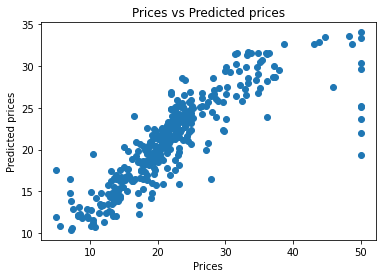

In [49]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

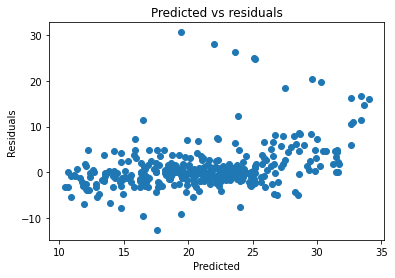

In [50]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

#### For test data

In [51]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [52]:
# Model Evaluation
acc_svm = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_svm)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.5900158460478175
Adjusted R^2: 0.5513941503856554
MAE: 3.7561453553021678
MSE: 42.81057499010245
RMSE: 6.54297906080269


# Evaluation and comparision of all the models

In [53]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'Support Vector Machines'],
    'R-squared Score': [acc_linreg*100, acc_rf*100, acc_xgb*100, acc_svm*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
2,XGBoost,85.799520
1,Random Forest,83.509835
0,Linear Regression,71.218184
3,Support Vector Machines,59.001585


## Hence XGBoost Regression works the best for this dataset.****